In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as go
import os

# Question 1 


- nombre d'observations = 499
- période = 1983 to 2025
- 7 parametres non conserver

In [56]:
df_ch4 = pd.read_csv('ch4_mm_gl.csv',header=45)
display(df_ch4)
print(df_ch4.columns)

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1625.96,2.19,1635.15,1.42
1,1983,8,1983.625,1628.05,2.72,1635.64,1.36
2,1983,9,1983.708,1638.42,2.16,1636.19,1.29
3,1983,10,1983.792,1644.81,1.40,1636.81,1.21
4,1983,11,1983.875,1642.60,0.71,1637.49,1.12
...,...,...,...,...,...,...,...
494,2024,9,2024.708,1935.67,-9.99,1931.99,-9.99
495,2024,10,2024.792,1941.58,-9.99,1932.75,-9.99
496,2024,11,2024.875,1940.44,-9.99,1933.49,-9.99
497,2024,12,2024.958,1937.52,-9.99,1934.23,-9.99


Index(['year', 'month', 'decimal', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')


# Question 2

In [ ]:
df_ch4 = df_ch4[['month', 'average']]
display(df_ch4)



,month,average
0,7,1625.96
1,8,1628.05
2,9,1638.42
3,10,1644.81
4,11,1642.60
...,...,...
494,9,1935.67
495,10,1941.58
496,11,1940.44
497,12,1937.52


# Question 3

# Question 4

v1 :

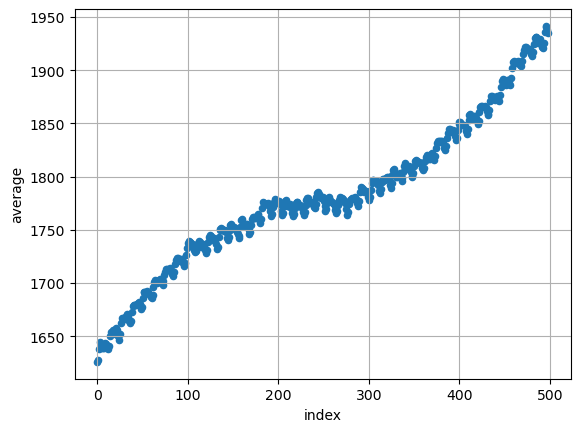

In [ ]:

df_ch4.reset_index().plot.scatter(x='index',y='average')
plt.grid(True)

V2 :

In [104]:
def scatterplot_graphique(dataframe,message):
    f = sns.scatterplot(data=dataframe.reset_index(), x="index", y="average", hue="month",legend="full")
    plt.grid(True)
    plt.title(message)

je prefère la version 2...

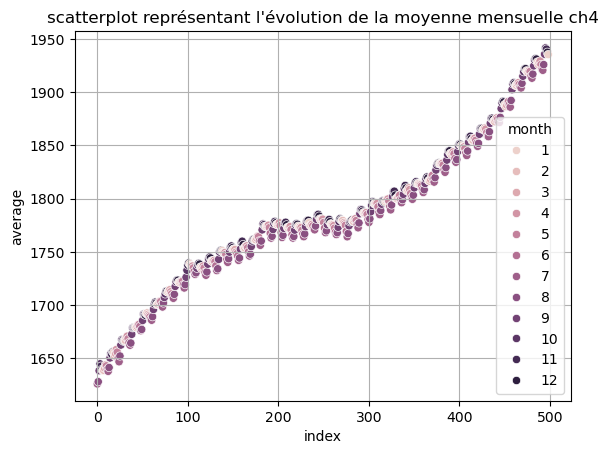

In [106]:
scatterplot_graphique(df_ch4,"scatterplot représentant l'évolution de la moyenne mensuelle ch4")

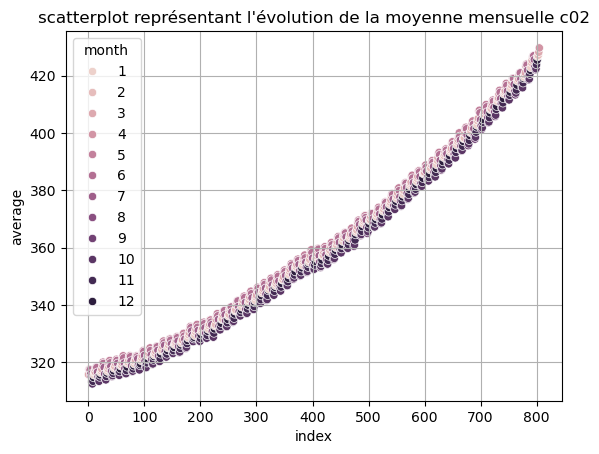

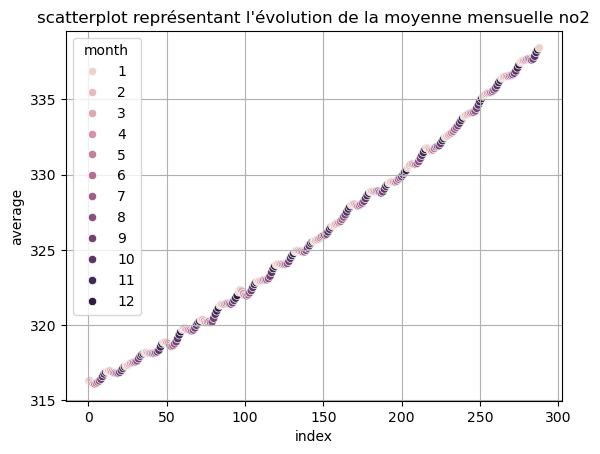

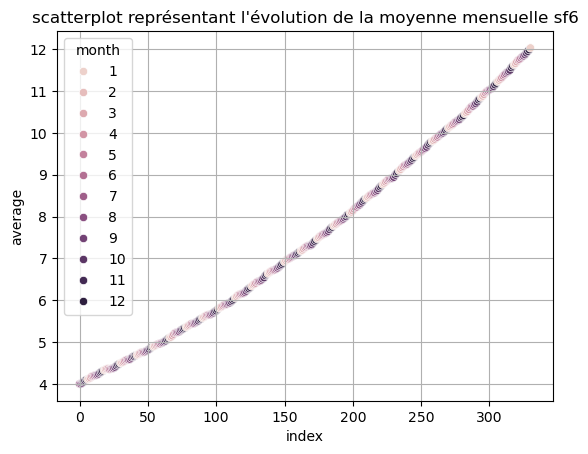

In [108]:
df_co2 = pd.read_csv('co2_mm_mlo.csv',header=40)
df_co2 = df_co2[['month', 'average']]
plt.figure()
scatterplot_graphique(df_co2,"scatterplot représentant l'évolution de la moyenne mensuelle c02")

df_n2o = pd.read_csv('n2o_mm_gl.csv',header=45)
df_n2o = df_n2o[['month', 'average']]
plt.figure()
scatterplot_graphique(df_n2o,"scatterplot représentant l'évolution de la moyenne mensuelle no2")

df_sf6 = pd.read_csv('sf6_mm_gl.csv',header=45)
df_sf6 = df_sf6[['month', 'average']]
plt.figure()
scatterplot_graphique(df_sf6,"scatterplot représentant l'évolution de la moyenne mensuelle sf6")



ch4 et no2 semble avoir des variations saisoniere du a l'epaisseur de la courbe.

# Question 5

## Question 5.1

In [ ]:
def moyenne_mobile_ordre_6(dataframe):
    window_size = 6
    smoothed_values = []
    smoothed_months = []

    for t in range(window_size, len(dataframe) - window_size):
        window = dataframe['average'].iloc[t - window_size : t + window_size + 1].values

        weighted_sum = 0.5 * window[0] + sum(window[1:-1]) + 0.5 * window[-1]
        smoothed_value = weighted_sum / 12

        smoothed_months.append(dataframe['month'].iloc[t])
        smoothed_values.append(smoothed_value)

    df_smoothed = pd.DataFrame({'month': smoothed_months, 'average_smoothed' : smoothed_values})
    return df_smoothed


In [113]:
def affichage_moyenne_mobile_ordre_6(dataframe,smoothed_dataframe,y_label): 
    sns.lineplot(data=dataframe.reset_index(), x="index", y="average", label="Original")
    sns.lineplot(data=smoothed_dataframe.reset_index(), x="index", y="average_smoothed", label="Moyenne Mobile (ordre 6)")
    plt.grid(True)
    plt.title("Lissage par moyenne mobile centrée (ordre 6)")
    plt.xlabel("index")
    plt.ylabel(y_label + " moyen")
    plt.legend()
    plt.show()

,month,average_smoothed
0,1,1639.139583
1,2,1640.187083
2,3,1641.240417
3,4,1642.142500
4,5,1643.007083
...,...,...
482,3,1927.365833
483,4,1928.285833
484,5,1929.119583
485,6,1929.755833


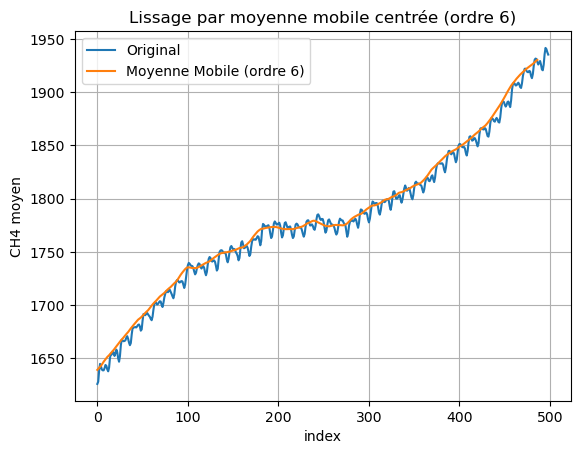

In [114]:
df_smoothed_ch4 = moyenne_mobile_ordre_6(df_ch4)
display(df_smoothed_ch4)
affichage_moyenne_mobile_ordre_6(df_ch4,df_smoothed_ch4,"CH4")

Il n'est pas possible de la faire sur les 6 premieres valeurs et les 6 dernieres.

,month,average_smoothed
0,1,4.109583
1,2,4.127500
2,3,4.145833
3,4,4.164167
4,5,4.182083
...,...,...
314,3,11.689167
315,4,11.722917
316,5,11.756250
317,6,11.788750


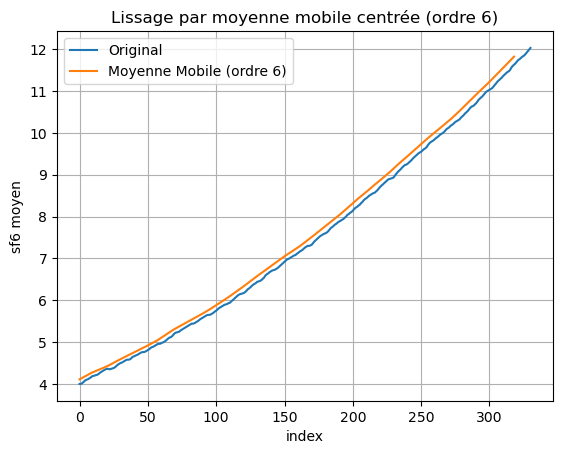

In [115]:
df_smoothed_sf6 = moyenne_mobile_ordre_6(df_sf6)
display(df_smoothed_sf6)
affichage_moyenne_mobile_ordre_6(df_sf6,df_smoothed_sf6,"sf6")

,month,average_smoothed
0,7,316.389583
1,8,316.443333
2,9,316.502083
3,10,316.565833
4,11,316.629583
...,...,...
272,3,337.443333
273,4,337.523333
274,5,337.607083
275,6,337.691667


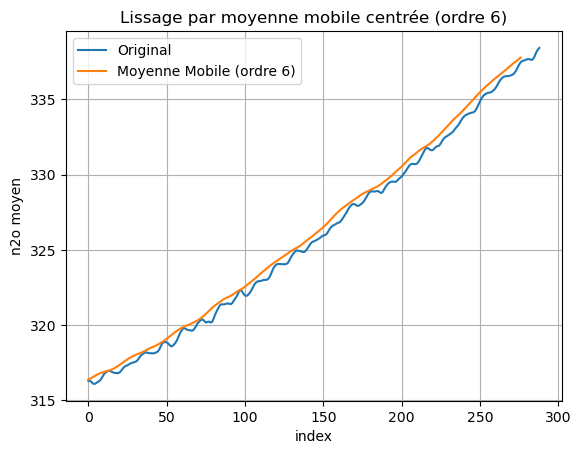

In [116]:
df_smoothed_n2o = moyenne_mobile_ordre_6(df_n2o)
display(df_smoothed_n2o)
affichage_moyenne_mobile_ordre_6(df_n2o,df_smoothed_n2o,"n2o")

,month,average_smoothed
0,9,315.409167
1,10,315.459583
2,11,315.503333
3,12,315.572500
4,1,315.637083
...,...,...
789,6,424.456667
790,7,424.764583
791,8,425.030833
792,9,425.252083


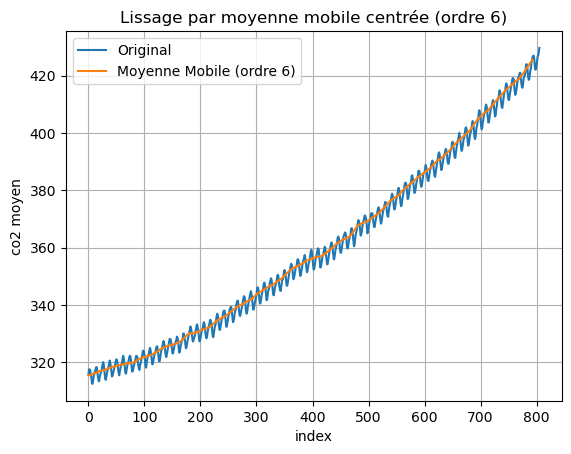

In [118]:
df_smoothed_co2 = moyenne_mobile_ordre_6(df_co2)
display(df_smoothed_co2)
affichage_moyenne_mobile_ordre_6(df_co2,df_smoothed_co2,"co2")

## Question 5.2